<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preperation" data-toc-modified-id="Data-file-preperation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preperation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#processed-directory-(all-data-files-produced-in-this-repository)" data-toc-modified-id="processed-directory-(all-data-files-produced-in-this-repository)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>processed</code> directory (all data files produced in this repository)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Power-plant-CO2-Signals" data-toc-modified-id="Power-plant-CO2-Signals-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Power plant CO2 Signals</a></span><ul class="toc-item"><li><span><a href="#Plant-Level" data-toc-modified-id="Plant-Level-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plant Level</a></span></li><li><span><a href="#Technology-Level" data-toc-modified-id="Technology-Level-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Technology Level</a></span></li><li><span><a href="#Country-level" data-toc-modified-id="Country-level-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Country level</a></span></li><li><span><a href="#Signal-analysis" data-toc-modified-id="Signal-analysis-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Signal analysis</a></span></li><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li></ul></li><li><span><a href="#ENTSO-E-generation-per-technology-CO2-Signal" data-toc-modified-id="ENTSO-E-generation-per-technology-CO2-Signal-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ENTSO-E generation per technology CO2 Signal</a></span><ul class="toc-item"><li><span><a href="#EF-preparation" data-toc-modified-id="EF-preparation-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>EF preparation</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#CO2-Signal-Example" data-toc-modified-id="CO2-Signal-Example-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>CO2 Signal Example</a></span></li><li><span><a href="#CO2-Duration-Curves" data-toc-modified-id="CO2-Duration-Curves-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>CO2 Duration Curves</a></span></li><li><span><a href="#Carbon-Intensity-Heat-Map" data-toc-modified-id="Carbon-Intensity-Heat-Map-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Carbon Intensity Heat Map</a></span></li></ul></li></ul></li><li><span><a href="#Export-final-CO2-signals" data-toc-modified-id="Export-final-CO2-signals-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Export final CO2 signals</a></span></li></ul></div>

# Introduction

This notebook uses the calculated EFs to design an different hourly CO2 emission signal for EU countries.

# Script setup

In [76]:
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from IPython.display import Image 
import datetime
from matplotlib.lines import Line2D

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 6]
sns.set_theme()

#helpers
from helpers import change_ENTSOE_ProductionTypeName

# Data directory preparention

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preperation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type

Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following two script that converts the data to hourly resolution and scale the data to reported yearly data:

- https://github.com/Open-Power-System-Data/time_series/tree/2020-10-06
- https://github.com/INATECH-CIG/entso-e_GenerationOutputPerType

File - > entso_gen_type_hourly_table_scaled.csv -> generation per technology


- 2) ENTSO-E production per unit

Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution:

- https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data_2018.csv -> hourly generation data per unit

File - > unit_data_2018.csv -> information about the generation units



In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\bootom_up_method', 'input\\entsoe_gen_type_hourly_table.csv', 'input\\entsoe_gen_type_hourly_table_scaled.csv', 'input\\gen_data_2018.csv', 'input\\matching_ENTSOE_EU_ETS.csv', 'input\\top_down_method', 'input\\unit_data_2018.csv']


## `processed` directory (all data files produced in this repository)

- 1) EF per type and county

File - > EF_bottom_up_method.csv

- 2) EF per unit

File -> generation_unit_EF_bottom_up_method.csv

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(processed_directory_path) :
    print("The directory for the CO2 Signal is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(processed_directory_path, fn) for fn in os.listdir(processed_directory_path)]

print(filenames)

['processed\\CI_0_top_down.csv', 'processed\\CI_1_top_down.csv', 'processed\\CI_bottom_up_method.csv', 'processed\\CI_MAP_1_top_down.csv', 'processed\\EF_bottom_up_method.csv', 'processed\\ei_AP_top_down.csv', 'processed\\ei_MAP_top_down.csv', 'processed\\generation_unit_EF_bottom_up_method.csv']


# Load data functions

In [5]:
def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_CO2_data(path, fn):
    """
    Own generation unit information with CO2 information per unit
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # set name for the index
    #df.index.set_names('eic_g', inplace=True)

    return df

def load_EF(path, fn):
    """
    Own generation EF per tech and country
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=[0,1])
    
    return df

def load_timeseries_ENTSOE(path, fn):
    """
    Read generation data from time-series package own modification.


    Parameters
    ----------
    path : TYPE
        DESCRIPTION.
    fn : TYPE
        DESCRIPTION.

    Returns
    -------
    generation : TYPE
        DESCRIPTION.

    """
   
    generation = (pd.read_csv(os.path.join(path, fn), index_col=[0], header=[0, 1], parse_dates=True))
       
    
    return generation

# Load data sets

#### Load EF per technology

In [6]:
EF = load_EF(processed_directory_path, 'EF_bottom_up_method.csv')

In [7]:
EF.head(10)

EF  Verified_EF  Coverage  \
MapCode ProductionTypeName                                    
AT      gas                 0.453639        False       8.0   
        hard_coal           0.884070         True      39.0   
BE      gas                 0.407627         True      37.0   
CZ      gas                 0.780843         True      39.0   
        hard_coal           0.985546         True      36.0   
        lignite             0.982654         True      42.0   
DE      gas                 0.647198        False       1.0   
        hard_coal           0.885272         True      63.0   
        lignite             1.125560         True      96.0   
DK      hard_coal           0.885182        False      17.0   

                            EF_round_in_gCO2_kwh  
MapCode ProductionTypeName                        
AT      gas                               453.64  
        hard_coal                         884.07  
BE      gas                               407.63  
CZ      gas                               780.84  
        hard_coal                         985.55  
        lignite                           982.65  
DE      gas                               647.20  
        hard_coal                         885.27  
        lignite                          1125.56  
DK      hard_coal                         885.18

In [8]:
countries = EF.index.levels[0]

#### Load power plant generation data

In [9]:
generation_per_unit = load_generation_per_unit(input_directory_path, 'gen_data_2018.csv')

#### Load power plant emission info data

In [10]:
generation_unit_info = load_unit_CO2_data(processed_directory_path, 'generation_unit_EF_bottom_up_method.csv')

#### Load ENTSO-E generation per type

In [11]:
entsoe_gen_type = load_timeseries_ENTSOE(input_directory_path, 'entsoe_gen_type_hourly_table_scaled.csv')

#### Filter generation set to generation info data

In [12]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

# Power plant CO2 Signals

In this section we build CO2 signal out of the used per power plant generation data. We limit the used generation to the generation units where we where able to calculated EFs.

In [13]:
generation_per_unit = generation_per_unit[generation_unit_info.index]

In [14]:
generation_per_unit.head(5)

,45W000000000032T,45W000000000033R,38W-MT--BEJG11-2,38W-MT--BEJG1Q-1,38W-KTJ-AUV-G1-8,45W000000000037J,38W-MT--EEJG5--5,38W-MT--EEJG8--U,38W-MT--EEJG6--1,38W-MT--EEJG7--Y,...,30WROVIROVI6---5,30WGALAGALA5---Q,30WGALATGALA3--G,48W000000GYAR-15,26WUULA-CASELL2N,26WUULA-CASELL4J,26WUULA-CASELL1P,26WUULA-CASELL3L,48W000000SUTB-1P,48W000000DEEP-1N
2018-01-01 00:00:00,20.53,0.0,149.5,0.2,271.8,0.0,101.3,207.9,0.1,0.0,...,233.5,0.0,29.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,19.81,0.0,183.2,0.2,271.2,0.0,133.9,208.0,0.1,0.0,...,207.8,0.0,29.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,19.63,0.0,184.4,0.1,271.6,0.0,170.0,207.9,0.1,0.0,...,154.1,0.0,29.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,22.39,0.0,184.4,0.1,271.5,0.0,174.7,207.9,0.1,0.0,...,155.2,0.0,29.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,23.08,0.0,184.4,0.0,272.0,0.0,174.7,207.9,0.1,0.0,...,159.8,0.0,29.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
generation_unit_info.head(5)

,MapCode,EUTL_countrycode,ProductionTypeName,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,PowerSystemResourceName,ProductionUnitEIC,duplicate_count,...,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation_2018,PP_emissions_2018,PP_EF2018,EF_2018_validation,Tech_EF,Country_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
45W000000000032T,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,147.0,Asnaesvaerket 2,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.3,2.022163e+05,0.922057,True,0.885182,0.885182
45W000000000033R,DK,DK,hard_coal,10Y1001A1001A796,Energinet CA,CTA,640.0,Asnaesvaerket 5,45V000000000011E,1.0,...,2430356,1765318,2484733,OPEN,770018.3,5.077847e+05,0.922057,True,0.885182,0.885182
38W-MT--BEJG11-2,EE,EE,other_fossil,10Y1001A1001A39I,Elering CA,CTA,192.0,Balti Elektrijaam -TG11,38W-MT--BEJ----R,0.0,...,1263972,1454336,1971239,OPEN,1115398.0,9.391379e+05,0.885799,True,1.057973,1.057973
38W-MT--BEJG1Q-1,EE,EE,other_fossil,10Y1001A1001A39I,Elering CA,CTA,140.0,Balti Elektrijaam -TG12,38W-MT--BEJ----R,0.0,...,1263972,1454336,1971239,OPEN,1115398.0,4.888014e+04,0.885799,True,1.057973,1.057973
38W-KTJ-AUV-G1-8,EE,EE,other_fossil,10Y1001A1001A39I,Elering CA,CTA,270.0,Auvere EJ- G1,38W-KTJ-AUVERE-Z,0.0,...,-1,-1,-1,OPEN,1629993.0,1.519008e+06,0.931911,True,1.057973,1.057973


## Plant Level

In [16]:
CO2_emission_per_unit_EF = generation_per_unit.multiply(generation_unit_info.PP_EF2018, axis='columns')

In [17]:
CO2_emission_per_unit_EF.dropna(axis=1, inplace=True)

In [18]:
CO2_emission_per_unit_EF.sum(axis=1).describe()

count     8760.000000
mean     50809.842387
std      10829.134562
min          0.000000
25%      43372.577820
50%      50724.873446
75%      58288.499323
max      80591.973486
dtype: float64

## Technology Level

In [19]:
CO2_emission_per_tech_EF = generation_per_unit.multiply((generation_unit_info.Tech_EF), axis='columns')

In [20]:
CO2_emission_per_tech_EF.dropna(axis=1, inplace=True)

In [21]:
CO2_emission_per_tech_EF.sum(axis=1).describe()

count     8760.000000
mean     50809.842387
std      10842.877365
min          0.000000
25%      43352.251737
50%      50752.774996
75%      58287.104757
max      80440.703607
dtype: float64

## Country level

In [22]:
CO2_emission_per_country_EF = generation_per_unit.multiply((generation_unit_info.Country_EF), axis='columns')

In [23]:
CO2_emission_per_country_EF.dropna(axis=1, inplace=True)

In [24]:
CO2_emission_per_country_EF.sum(axis=1).describe()

count     8760.000000
mean     50809.842387
std      11531.929989
min          0.000000
25%      42557.874479
50%      50471.129591
75%      58827.678974
max      82657.891082
dtype: float64

## Signal analysis 

#### Scatter Plot

In [25]:
Carbon_intensitiy = pd.DataFrame()
Carbon_intensitiy['unit_EF'] = ((CO2_emission_per_unit_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['tech_EF'] = ((CO2_emission_per_tech_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['country_EF'] = ((CO2_emission_per_country_EF * 1000000).sum(axis=1) / (generation_per_unit * 1000).sum(axis=1))
Carbon_intensitiy['diff_norm_unit_vs_tech'] = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['tech_EF']) / Carbon_intensitiy['tech_EF']
Carbon_intensitiy['diff_norm_unit_vs_country'] = (Carbon_intensitiy['unit_EF'] - Carbon_intensitiy['country_EF']) / Carbon_intensitiy['country_EF']

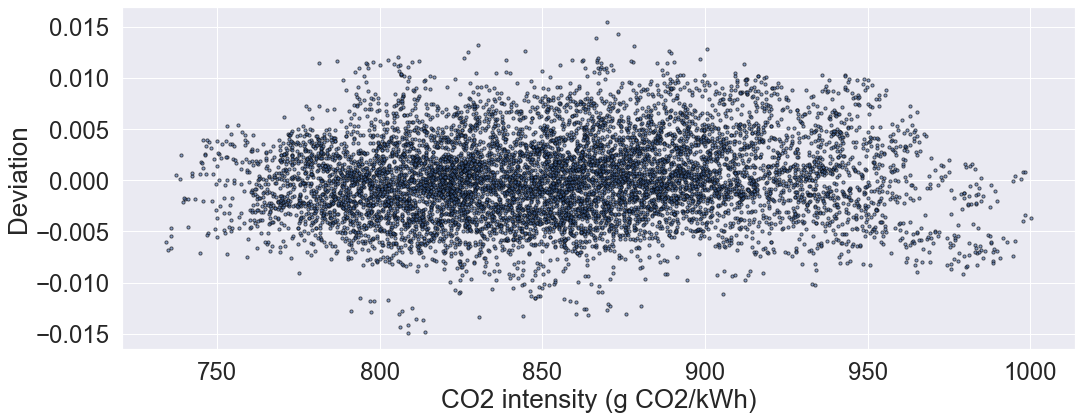

In [83]:
Carbon_intensitiy

fig,ax = plt.subplots(1,1)
    
#fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="tech_EF", y="diff_norm_unit_vs_tech", ax=ax, alpha=0.6, s=10, edgecolor='black', color='b')

ax.set_ylabel("Deviation", fontsize=26)
ax.set_xlabel("CO2 intensity (g CO2/kWh)" , fontsize=26)

ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)

fig.tight_layout()

pass

In [84]:
fig.savefig(os.path.join(output_directory_path + '/_CO2_intensity_deviation_tech_vs_unit.png'))

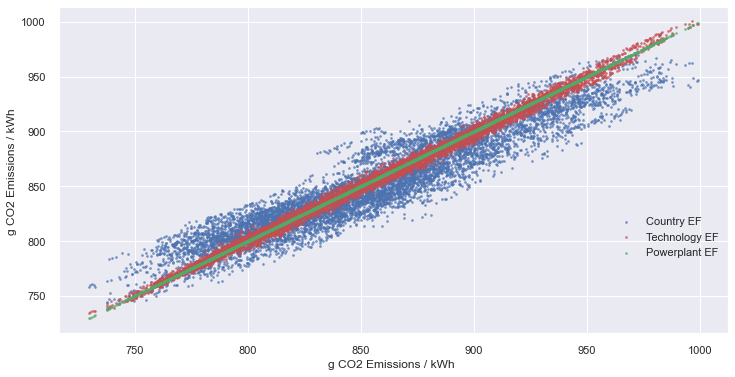

In [28]:
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)


Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="country_EF", ax=ax, alpha=0.6, color='b', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="tech_EF", ax=ax, alpha=0.6, color='r', s=3)

Carbon_intensitiy.plot(kind='scatter', x="unit_EF", y="unit_EF", ax=ax, alpha=0.6, color='g', s=3)



ax.set_ylabel("g CO2 Emissions / kWh ")
ax.set_xlabel("g CO2 Emissions / kWh ")

ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(1.0, 0.2))

In [29]:
Carbon_intensitiy_per_country_unit_EF = ((CO2_emission_per_unit_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum()) / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_tech_EF = (CO2_emission_per_tech_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()
Carbon_intensitiy_per_country_country_EF = (CO2_emission_per_country_EF * 1000000).groupby(generation_unit_info.MapCode, axis=1).sum() / (generation_per_unit * 1000).groupby(generation_unit_info.MapCode, axis=1).sum()

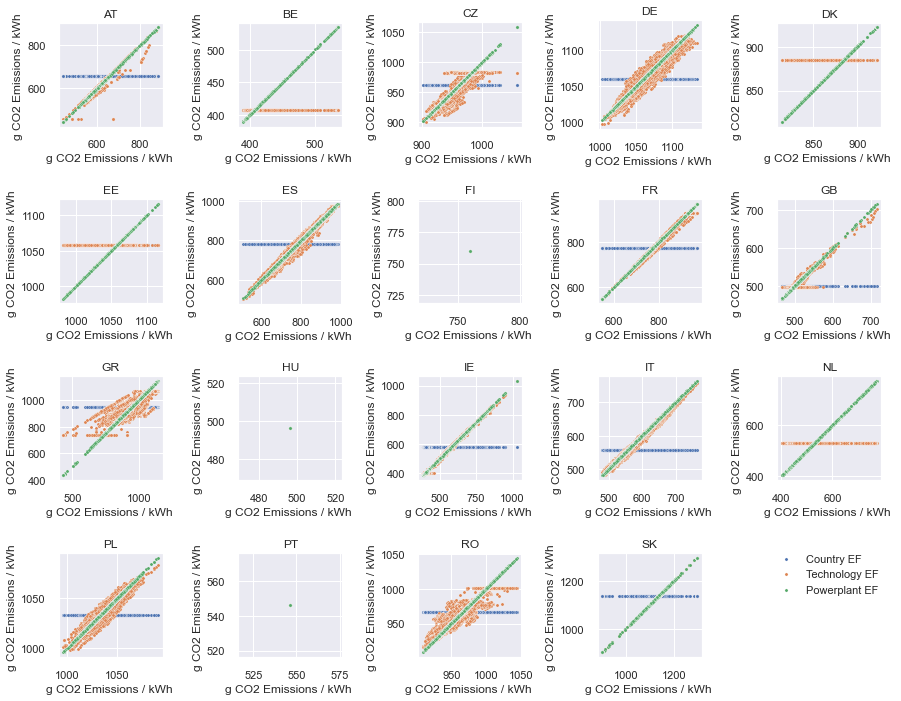

In [30]:
n_graphs = len(Carbon_intensitiy_per_country_unit_EF.columns)
n_cols = 5
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

fig.delaxes(axes[3][4])

size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(Carbon_intensitiy_per_country_unit_EF.columns):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
    
    ax.set(aspect='equal')
    
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_country_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_tech_EF.loc[:,country], s=10, ax=ax)
    sns.scatterplot(x=Carbon_intensitiy_per_country_unit_EF.loc[:,country], y=Carbon_intensitiy_per_country_unit_EF.loc[:,country], s=10, ax=ax)
    
        #max_lim = (max(entso_DE.loc[:,tech].max(),generation_DE.loc[:,tech].max())//1000)*1000+1000
        #if max_lim < 0:
        #    max_lim = 0
        
        #min_lim = (min(entso_DE.loc[:,tech].min(),generation_DE.loc[:,tech].min())//1000)*1000-1000
        #if min_lim < 0:
        #    min_lim = 0
    
    ax.set_title(country)
        #ax.set_xlim(min_lim,max_lim)
        #ax.set_ylim(min_lim,max_lim)
        
    ax.set_xlabel("g CO2 Emissions / kWh ")
    ax.set_ylabel("g CO2 Emissions / kWh ")
    
    fig.tight_layout()
    
ax.legend(['Country EF', 'Technology EF', 'Powerplant EF'] ,loc='lower right', bbox_to_anchor=(2.8, 0.5))

#### EF distribution

Text(0.5, 0, 'Country')

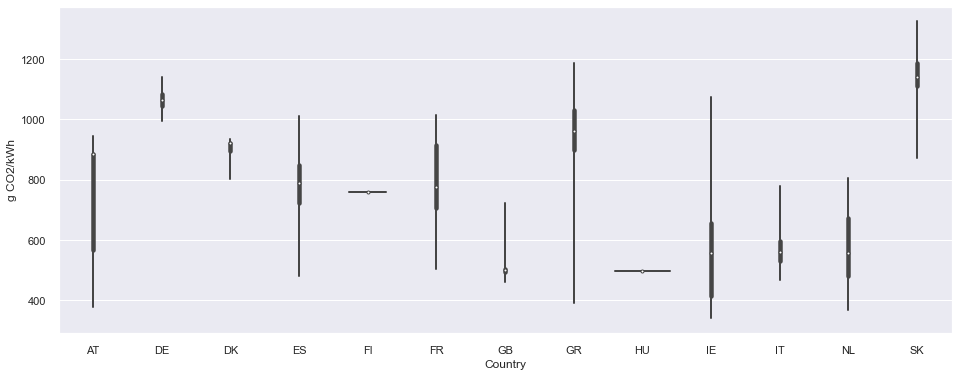

In [31]:
# per unit EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(16,6)
ax = sns.violinplot(data=Carbon_intensitiy_per_country_unit_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

Text(0.5, 0, 'Country')

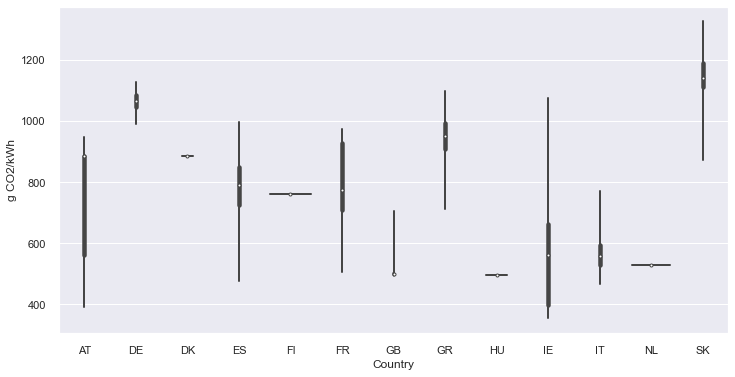

In [32]:
# per tech ef
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_tech_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

Text(0.5, 0, 'Country')

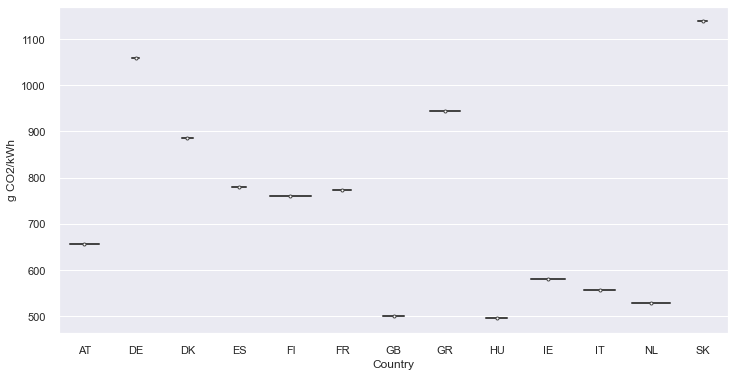

In [33]:
# per country EF
fig,ax = plt.subplots(1,1)
    
fig.set_size_inches(12,6)

ax = sns.violinplot(data=Carbon_intensitiy_per_country_country_EF[['AT', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE',
       'IT', 'NL', 'SK']])#,'BE']])

ax.set_ylabel("g CO2/kWh")
ax.set_xlabel("Country")

## CO2 Signal Example

The following plot shows an example of the three generated CO2 Signals

In [34]:
def plot_production_profile(generation, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generators, countries, start, end):
    
    # load and filter data
    generators = generators[generators.MapCode == countries]
    generation = generation[generators.index]
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF[generators.index]
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF[generators.index]
    CO2_emission_per_country_EF = CO2_emission_per_country_EF[generators.index]
    
    # sum technologies
    generation_car =  generation.groupby(generators.ProductionTypeName, axis=1).sum()
    
    # sum Emissions
    CO2_emission_per_unit_EF = CO2_emission_per_unit_EF.sum(axis=1)
    CO2_emission_per_tech_EF = CO2_emission_per_tech_EF.sum(axis=1)
    CO2_emission_per_country_EF = CO2_emission_per_country_EF.sum(axis=1)
    
    # Carbon intensity
    Carbon_intensitiy_unit_EF = (CO2_emission_per_unit_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_tech_EF = (CO2_emission_per_tech_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    Carbon_intensitiy_country_EF = (CO2_emission_per_country_EF * 1000000) / ((generation_car * 1000).sum(axis=1))
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'onwind': '#235ebc',
              'offwind': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a'}

    generation_car = generation_car.loc[start:end]
    Carbon_intensitiy_unit_EF = Carbon_intensitiy_unit_EF.loc[start:end]
    Carbon_intensitiy_tech_EF = Carbon_intensitiy_tech_EF.loc[start:end]
    Carbon_intensitiy_country_EF = Carbon_intensitiy_country_EF.loc[start:end]


    #order of col
    #cols = ['lignite', 'hard_coal',  'gas']#, 'other_fossil']

    #p_by_carrier = p_by_carrier[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(12,6)

    generation_car.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation_car.columns],
                        alpha=0.7)



    ax.set_ylabel("Production [MW]")
    ax.set_xlabel("Date")
    ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.5))

    #ax3 = ax.twinx()
    Carbon_intensitiy_unit_EF.plot(ax=ax, secondary_y=True, legend=False)


    Carbon_intensitiy_tech_EF.plot(ax=ax, secondary_y=True, legend=False)

    Carbon_intensitiy_country_EF.plot(ax=ax, secondary_y=True, legend=False)

    ax.right_ax.set_ylabel("Emission intensity [g CO2 / kWh]")

    #ax.set_xlim(0,snapLength-1)
    #ax.set_ylim(0,150000)
    #ax.right_ax.set_ylim(0,0.1)
    plt.tight_layout()
    
    return

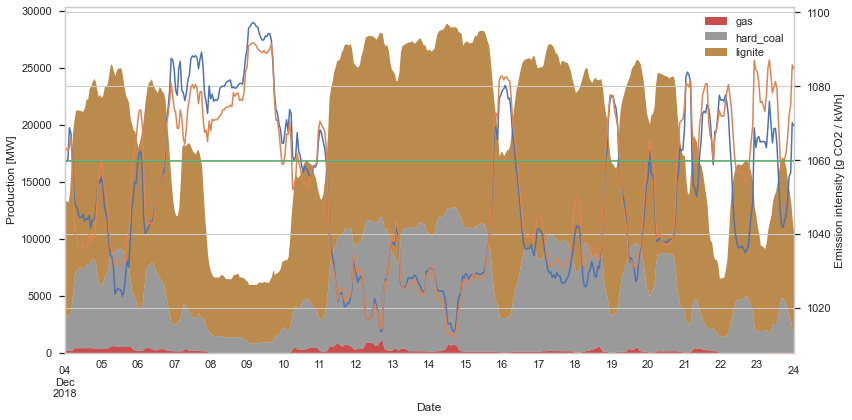

In [35]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

#Carbon_intensitiy_per_country_unit_EF
#Carbon_intensitiy_per_country_tech_EF
#Carbon_intensitiy_per_country_country_EF

plot_production_profile(generation_per_unit, CO2_emission_per_unit_EF, CO2_emission_per_tech_EF, CO2_emission_per_country_EF, generation_unit_info, 'DE', start, end)


# ENTSO-E generation per technology CO2 Signal

In this section we using the country specific EF for generating an CO2 emission signal for all EU countries. The production data are based on the production per type data from ENTSO-E

In [36]:
# take a look at the generation data
entsoe_gen_type.head(5)

region                         AT                                      \
variable                  biomass        gas   hard_coal        hydro   
utc_timestamp                                                           
2018-01-01 00:00:00+00:00   316.0  85.185998  189.813350  3633.105979   
2018-01-01 01:00:00+00:00   316.0  83.986195  188.547928  3557.076855   
2018-01-01 02:00:00+00:00   316.0  82.786393  188.547928  3439.774779   
2018-01-01 03:00:00+00:00   316.0  86.385801  188.547928  3432.171866   
2018-01-01 04:00:00+00:00   316.0  89.985209  188.547928  3616.814024   

region                                                               \
variable                  other_fossil other_renewable solar  waste   
utc_timestamp                                                         
2018-01-01 00:00:00+00:00   376.712329             0.0   0.0  100.0   
2018-01-01 01:00:00+00:00   376.712329             0.0   0.0  100.0   
2018-01-01 02:00:00+00:00   376.712329             0.0   0.0  100.0   
2018-01-01 03:00:00+00:00   376.712329             0.0   0.0  100.0   
2018-01-01 04:00:00+00:00   376.712329             0.0   0.0  100.0   

region                                          BE  ...           SI  \
variable                  wind_onshore     biomass  ... wind_onshore   
utc_timestamp                                       ...                
2018-01-01 00:00:00+00:00        832.0  310.564338  ...         0.70   
2018-01-01 01:00:00+00:00        926.0  205.181412  ...         0.61   
2018-01-01 02:00:00+00:00        692.0  178.621922  ...         0.57   
2018-01-01 03:00:00+00:00        453.0  175.522424  ...         0.62   
2018-01-01 04:00:00+00:00        321.0  175.362106  ...         0.56   

region                            SK                                     \
variable                     biomass         gas  hard_coal       hydro   
utc_timestamp                                                             
2018-01-01 00:00:00+00:00  75.757569  223.815846  71.307423  490.635794   
2018-01-01 01:00:00+00:00  75.488926  220.374486  71.159174  497.114042   
2018-01-01 02:00:00+00:00  75.488926  206.609047  69.231947  552.469700   
2018-01-01 03:00:00+00:00  79.787227  178.823253  67.156471  632.576139   
2018-01-01 04:00:00+00:00  79.249940  182.901901  68.787202  605.737684   

region                                                                        
variable                  lignite nuclear other_fossil other_renewable solar  
utc_timestamp                                                                 
2018-01-01 00:00:00+00:00   179.5  1819.3        478.8            41.4   0.0  
2018-01-01 01:00:00+00:00   177.9  1816.7        475.8            41.0   0.0  
2018-01-01 02:00:00+00:00   174.7  1808.7        469.5            40.8   0.0  
2018-01-01 03:00:00+00:00   168.5  1803.6        455.6            39.4   0.0  
2018-01-01 04:00:00+00:00   170.6  1809.1        461.5            40.4   0.0  

[5 rows x 214 columns]

## EF preparation 

In [37]:
EF

EF  Verified_EF  Coverage  \
MapCode ProductionTypeName                                    
AT      gas                 0.453639        False       8.0   
        hard_coal           0.884070         True      39.0   
BE      gas                 0.407627         True      37.0   
CZ      gas                 0.780843         True      39.0   
        hard_coal           0.985546         True      36.0   
        lignite             0.982654         True      42.0   
DE      gas                 0.647198        False       1.0   
        hard_coal           0.885272         True      63.0   
        lignite             1.125560         True      96.0   
DK      hard_coal           0.885182        False      17.0   
EE      other_fossil        1.057973         True     109.0   
ES      gas                 0.406779        False      25.0   
        hard_coal           0.971333         True      80.0   
FI      other_fossil        0.759814        False      13.0   
FR      gas                 0.548522        False       9.0   
        hard_coal           0.928832         True      73.0   
GB      gas                 0.497777         True      60.0   
        hard_coal           1.017827        False       3.0   
GR      gas                 0.737096        False      16.0   
        lignite             1.070488         True      27.0   
HU      gas                 0.496379        False       8.0   
IE      gas                 0.399074         True      32.0   
        hard_coal           1.032204         True      89.0   
IT      gas                 0.410098         True      35.0   
        hard_coal           0.994526         True      56.0   
        other_fossil        0.488065        False      16.0   
NL      gas                 0.529251        False       9.0   
PL      gas                 0.476568        False       3.0   
        hard_coal           0.933793         True      53.0   
        lignite             1.158647         True      78.0   
PT      gas                 0.546439        False      14.0   
RO      gas                 0.592513        False      11.0   
        lignite             1.000763         True      88.0   
SK      hard_coal           0.903090         True      65.0   
        lignite             1.295547         True      87.0   

                            EF_round_in_gCO2_kwh  
MapCode ProductionTypeName                        
AT      gas                               453.64  
        hard_coal                         884.07  
BE      gas                               407.63  
CZ      gas                               780.84  
        hard_coal                         985.55  
        lignite                           982.65  
DE      gas                               647.20  
        hard_coal                         885.27  
        lignite                          1125.56  
DK      hard_coal                         885.18  
EE      other_fossil                     1057.97  
ES      gas                               406.78  
        hard_coal                         971.33  
FI      other_fossil                      759.81  
FR      gas                               548.52  
        hard_coal                         928.83  
GB      gas                               497.78  
        hard_coal                        1017.83  
GR      gas                               737.10  
        lignite                          1070.49  
HU      gas                               496.38  
IE      gas                               399.07  
        hard_coal                        1032.20  
IT      gas                               410.10  
        hard_coal                         994.53  
        other_fossil                      488.06  
NL      gas                               529.25  
PL      gas                               476.57  
        hard_coal                         933.79  
        lignite                          1158.65  
PT      gas                               546.44  
RO      gas        

In [38]:
EF_mean = EF.groupby('ProductionTypeName').mean()

# Using a mean EF for other fossils of 0.75 because we only cover some countries with other fossils
# and the resulting mean EF would be above 1.0, which seems too high.
EF_mean.loc['other_fossil'] = 0.75
# converting EF_mean to a diconary
EF_mean = EF_mean.EF.to_dict()

#show resulting EF
print(EF_mean)

{'gas': 0.5286534973368929, 'hard_coal': 0.947425127522635, 'lignite': 1.1056098674448815, 'other_fossil': 0.75}


In [39]:
# If no country-specific EFs are available and also no mean EF is available for a country and technology,
# we use the following standard EFs. In addition, we define for the renewable generation types a EF with
# an emission value of 0.
# Source: 

EF_default = {'biomass':0,
              'geothermal':0,
              'hydro':0,
              'nuclear':0,
              'oil':0.8,
              'other_renewable':0,
              'solar':0,
              'waste':0.2,
              'wind_offshore':0,
              'wind_onshore':0,
              'marine':0,
              'oil shale':0.51,
              'other_fossil': 0.51}

In [40]:
# Create a dataframe with the EF for each country and technology. If no specific EF is available, we use the default EF.
EF_multi = {}

for i in entsoe_gen_type.columns:
    if i in EF.index:
        print(str(i)+' EF')
        EF_multi[i] = EF.loc[i[0],i[1]].loc['EF']
    elif i[1] in EF_mean:
        print(str(i) +' EF_mean')
        EF_multi[i] = EF_mean[i[1]]
    else:
        print(str(i) + ' EF_default')
        EF_multi[i] = EF_default[i[1]]

('AT', 'biomass') EF_default
('AT', 'gas') EF
('AT', 'hard_coal') EF
('AT', 'hydro') EF_default
('AT', 'other_fossil') EF_mean
('AT', 'other_renewable') EF_default
('AT', 'solar') EF_default
('AT', 'waste') EF_default
('AT', 'wind_onshore') EF_default
('BE', 'biomass') EF_default
('BE', 'gas') EF
('BE', 'hydro') EF_default
('BE', 'nuclear') EF_default
('BE', 'other_fossil') EF_mean
('BE', 'solar') EF_default
('BE', 'waste') EF_default
('BE', 'wind_offshore') EF_default
('BE', 'wind_onshore') EF_default
('BG', 'biomass') EF_default
('BG', 'gas') EF_mean
('BG', 'hard_coal') EF_mean
('BG', 'hydro') EF_default
('BG', 'lignite') EF_mean
('BG', 'nuclear') EF_default
('BG', 'solar') EF_default
('BG', 'waste') EF_default
('BG', 'wind_onshore') EF_default
('CH', 'hydro') EF_default
('CH', 'nuclear') EF_default
('CH', 'solar') EF_default
('CH', 'wind_onshore') EF_default
('CY', 'other_fossil') EF_mean
('CY', 'wind_onshore') EF_default
('CZ', 'biomass') EF_default
('CZ', 'gas') EF
('CZ', 'hard_co

In [41]:
# calculate emissions based on EF and generation per type
CO2_emission_entsoe_gen_type = entsoe_gen_type * EF_multi

In [42]:
# From the previously calculated emissions, an emission signal (g CO2 / kWh) can now be calculated for each country.
# Since emissions and generation are available per technology, they must first be grouped and summed. 

# Emission in g CO2
CO2_emission = (CO2_emission_entsoe_gen_type * 1000000).groupby(level=0, axis=1).sum()
# generation in kWh
Generation = (entsoe_gen_type * 1000).groupby(level=0, axis=1).sum()

# CI in g CO2/kWh
Carbon_intensitiy_entsoe_gen_type = CO2_emission.div(Generation)

In [43]:
Carbon_intensitiy_entsoe_gen_type.head(5)

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,91.994023,107.445608,460.888004,0.0,711.769154,433.267602,217.827607,111.281244,881.352973,118.809143,...,1105.609867,173.045920,16.034580,665.998411,170.559757,388.222081,822.219190,52.145929,256.651669,229.068145
2018-01-01 01:00:00+00:00,91.437201,112.249971,461.008270,0.0,703.608227,430.526059,216.761245,129.897348,874.592871,131.764721,...,1105.609867,172.426002,17.120685,650.139106,176.108133,384.981306,844.022549,52.648221,251.431943,227.546822
2018-01-01 02:00:00+00:00,97.535853,117.980424,461.797364,0.0,663.884415,427.582473,213.630754,122.693214,876.854311,151.300739,...,1105.609867,169.794888,18.916556,640.419661,165.506698,401.363437,850.018702,49.125930,234.396334,220.810702
2018-01-01 03:00:00+00:00,102.650999,117.039334,461.311169,0.0,662.996651,430.289794,214.078055,123.907974,887.343951,151.580405,...,1105.609867,168.031287,18.906941,643.339266,172.086340,409.395974,832.289665,49.262182,242.282546,208.785687
2018-01-01 04:00:00+00:00,101.824413,116.455987,462.871315,0.0,698.348891,435.487895,211.626428,119.303605,886.185304,153.068740,...,1105.609867,168.037640,18.809351,634.557227,172.615140,413.653259,847.632886,48.770799,243.153261,212.375440


In [44]:
mean_Carbon_intensitiy_entsoe_gen_type = CO2_emission.sum() / Generation.sum()

In [45]:
Carbon_intensitiy_entsoe_gen_type_mean = Carbon_intensitiy_entsoe_gen_type.copy()


In [46]:
for i in Carbon_intensitiy_entsoe_gen_type_mean.columns:
    Carbon_intensitiy_entsoe_gen_type_mean[i] = mean_Carbon_intensitiy_entsoe_gen_type[i]

In [47]:
Carbon_intensitiy_entsoe_gen_type_mean.head()

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,136.013365,187.568265,498.381237,0.0,717.675735,496.080506,464.542421,265.800984,895.459662,323.050243,...,438.087013,507.083981,17.398905,838.179883,340.118642,344.90387,787.141787,40.896989,319.800778,218.703424
2018-01-01 01:00:00+00:00,136.013365,187.568265,498.381237,0.0,717.675735,496.080506,464.542421,265.800984,895.459662,323.050243,...,438.087013,507.083981,17.398905,838.179883,340.118642,344.90387,787.141787,40.896989,319.800778,218.703424
2018-01-01 02:00:00+00:00,136.013365,187.568265,498.381237,0.0,717.675735,496.080506,464.542421,265.800984,895.459662,323.050243,...,438.087013,507.083981,17.398905,838.179883,340.118642,344.90387,787.141787,40.896989,319.800778,218.703424
2018-01-01 03:00:00+00:00,136.013365,187.568265,498.381237,0.0,717.675735,496.080506,464.542421,265.800984,895.459662,323.050243,...,438.087013,507.083981,17.398905,838.179883,340.118642,344.90387,787.141787,40.896989,319.800778,218.703424
2018-01-01 04:00:00+00:00,136.013365,187.568265,498.381237,0.0,717.675735,496.080506,464.542421,265.800984,895.459662,323.050243,...,438.087013,507.083981,17.398905,838.179883,340.118642,344.90387,787.141787,40.896989,319.800778,218.703424


## Plots

This section is to see some plots for the generated and emission data

### CO2 Signal Example

In [48]:
entsoe_gen_type.columns.levels[1]

Index(['biomass', 'gas', 'hard_coal', 'hydro', 'lignite', 'nuclear',
       'other_fossil', 'other_renewable', 'solar', 'waste', 'wind_offshore',
       'wind_onshore'],
      dtype='object', name='variable')

In [49]:
def plot_production_profile_2(generation, Carbon_intensitiy, mean_Carbon_intensitiy, countries, start, end):
    
    # load and filter data
    generation = generation[countries]
    Carbon_intensitiy = Carbon_intensitiy[countries]
    Carbon_intensitiy_mean = mean_Carbon_intensitiy[countries]
    
    
    #plotting
    import seaborn as sns

    sns.set(style="whitegrid")

    colors = {'gas': '#b20101',
              'biomass': '#0c6013',
              'hard_coal': '#707070',
              'geothermal': '#ba91b1',
              'lignite': '#9e5a01',
              'nuclear': '#ff9000',
              'oil': '#262626',
              'other_fossil': '#d35050',
              'waste': '#68896b',
              'wind_onshore': '#235ebc',
              'wind_offshore': '#6895dd',
              'solar': '#f9d002',
              'PHS': '#08ad97',
              'hydro': '#08ad97',
              'ror': '#4adbc8',
              'load': '#ea048a',
              'other_renewable':'#08ad97'}

    generation = generation.loc[start:end]
    Carbon_intensitiy = Carbon_intensitiy.loc[start:end]
    Carbon_intensitiy_mean = Carbon_intensitiy_mean.loc[start:end]



    #order of col
    tech = ['biomass', 'nuclear','lignite', 'hard_coal','geothermal', 'hydro', 'gas','waste', 'oil', 'other_fossil', 'other_renewable', 'solar',  'wind_offshore', 'wind_onshore']
    
    filter = generation.columns
    
    cols = [k for k in tech if k in filter]

    generation = generation[cols]



    fig,ax = plt.subplots(1,1)

    fig.set_size_inches(16,6)

    generation.plot(kind="area",
                        ax=ax,
                        linewidth=0,
                        color=[colors[col] for col in generation.columns],
                        alpha=0.7)



    ax.set_ylabel("Production (MW)", fontsize=14)
    ax.set_xlabel("Date", fontsize=14)
    #ax.legend(loc='center left', bbox_to_anchor=(1.08, 0.5))
    ax.grid(False)
    
    ax2 = fig.add_axes() # This is the magic that joins the x-axis
    ax2 = ax.twinx()

    #ax3 = ax.twinx()
    
    Carbon_intensitiy.plot(ax=ax2, secondary_y=True, legend=False, color="k")
    Carbon_intensitiy_mean.plot(ax=ax2, secondary_y=True, legend=False, color="k", linestyle='--')    
    
        
    handles = [Line2D([0], [0], color='k', lw=2),
               Line2D([0], [0], color='k', linestyle='--', lw=2)
               ]
    
    labels = [str(countries)+ ', using technology-specific EF',str(countries) + ', using country-specific EF']
    
    l2 = ax2.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.10, 0.90),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='Carbon intensity', fontsize=14, frameon=True)
    
    handles = []
    labels = []
    
    for t in generation.columns:
        handles.append(plt.Line2D([0], [0], color=colors[t], marker='o', markersize=8, linewidth=0, alpha=0.7))
        labels.append(t)
        
    l3 = ax.legend(handles, labels,  bbox_to_anchor=(1.10, 0.7),
                   handletextpad=0., columnspacing=0.5, ncol=2,
                   title='Technology Types', fontsize=14, frameon=True, framealpha=0.6) #loc="upper right", 
    
    


    ax2.right_ax.set_ylabel("Carbon intensity (g CO2 / kWh)", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    return fig

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


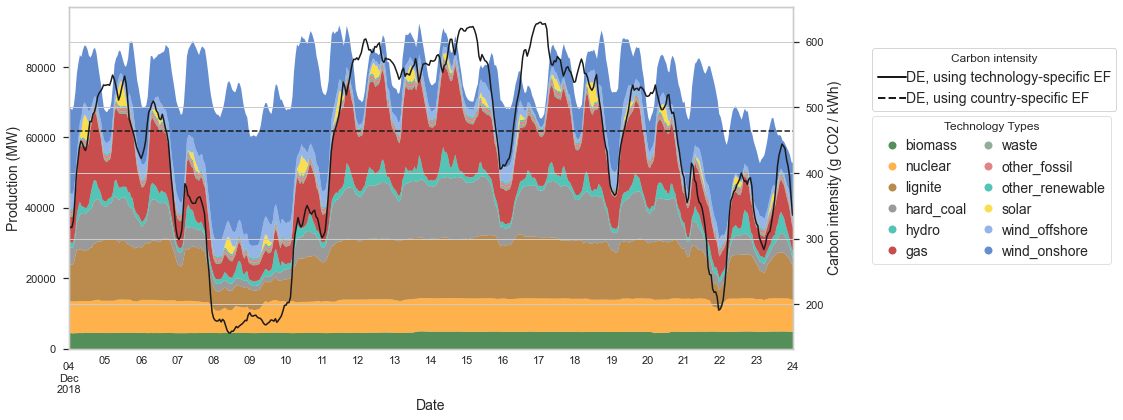

In [50]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'DE', start, end)

In [51]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_DE.png'))

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


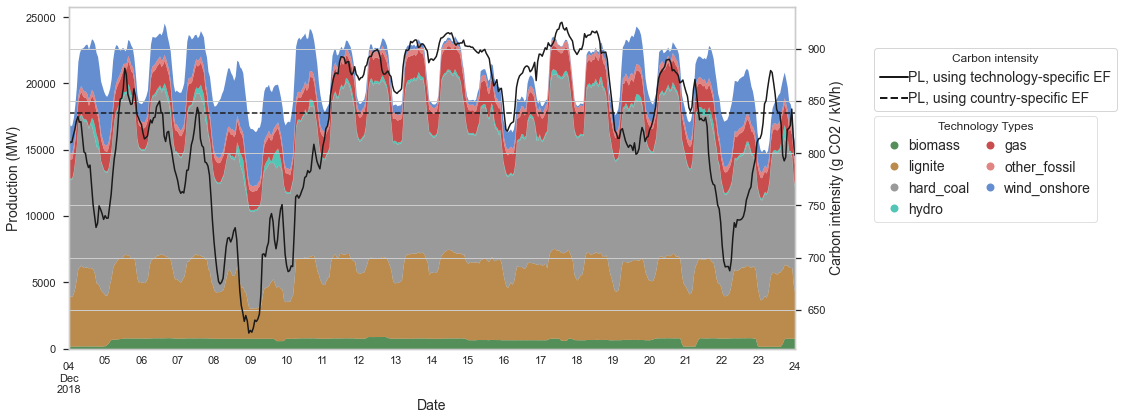

In [52]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'PL', start, end)

In [53]:
fig.savefig(os.path.join(output_directory_path + '/CO2_signal_example_PL.png'))

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


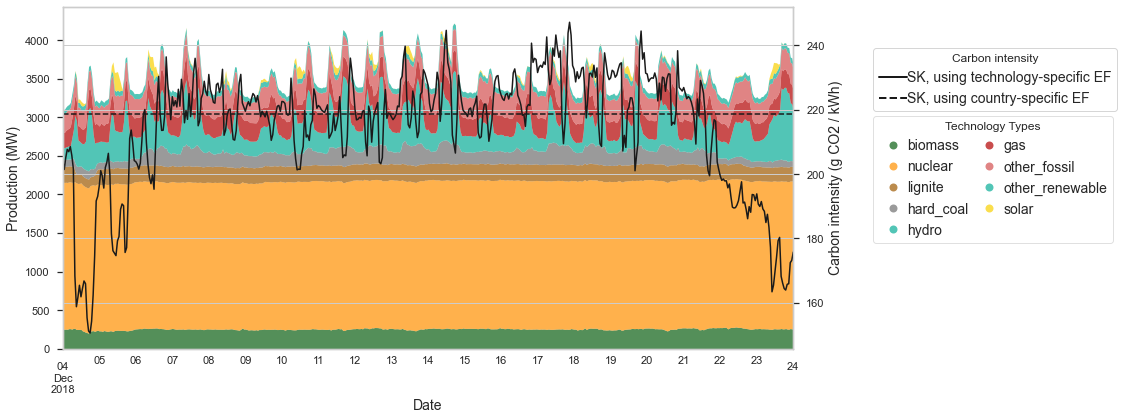

In [54]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'SK', start, end)

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.


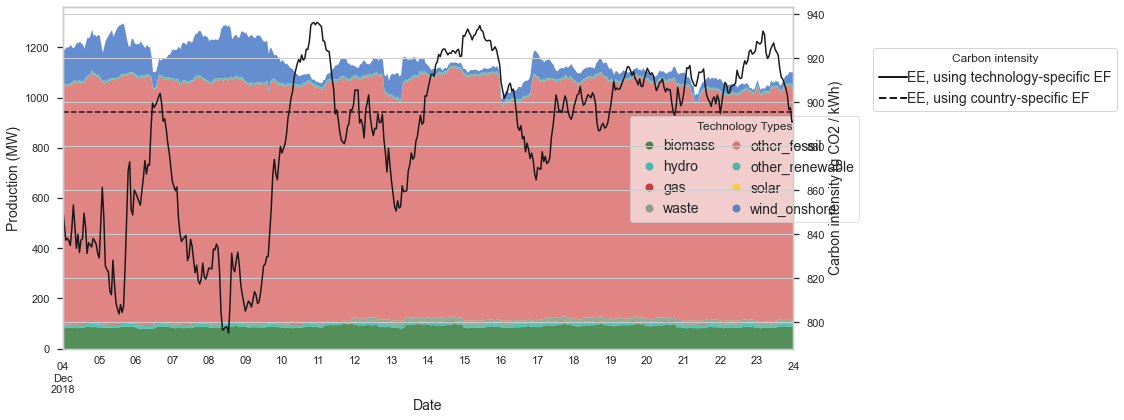

In [55]:
start = datetime.date(2018, 12, 4)
end = datetime.date(2018, 12, 24)

fig = plot_production_profile_2(entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type, Carbon_intensitiy_entsoe_gen_type_mean, 'EE', start, end)

### CO2 Duration Curves

In [56]:
countries = Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns

In [57]:
countries

Index(['AT', 'BE', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU',
       'IE', 'IT', 'NL', 'PL', 'PT', 'RO', 'SK'],
      dtype='object', name='region')

In [58]:
Carbon_intensitiy_entsoe_gen_type

region,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,ME,NL,NO,PL,PT,RO,RS,SE,SI,SK
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,91.994023,107.445608,460.888004,0.0,711.769154,433.267602,217.827607,111.281244,881.352973,118.809143,...,1105.609867,173.045920,16.034580,665.998411,170.559757,388.222081,822.219190,52.145929,256.651669,229.068145
2018-01-01 01:00:00+00:00,91.437201,112.249971,461.008270,0.0,703.608227,430.526059,216.761245,129.897348,874.592871,131.764721,...,1105.609867,172.426002,17.120685,650.139106,176.108133,384.981306,844.022549,52.648221,251.431943,227.546822
2018-01-01 02:00:00+00:00,97.535853,117.980424,461.797364,0.0,663.884415,427.582473,213.630754,122.693214,876.854311,151.300739,...,1105.609867,169.794888,18.916556,640.419661,165.506698,401.363437,850.018702,49.125930,234.396334,220.810702
2018-01-01 03:00:00+00:00,102.650999,117.039334,461.311169,0.0,662.996651,430.289794,214.078055,123.907974,887.343951,151.580405,...,1105.609867,168.031287,18.906941,643.339266,172.086340,409.395974,832.289665,49.262182,242.282546,208.785687
2018-01-01 04:00:00+00:00,101.824413,116.455987,462.871315,0.0,698.348891,435.487895,211.626428,119.303605,886.185304,153.068740,...,1105.609867,168.037640,18.809351,634.557227,172.615140,413.653259,847.632886,48.770799,243.153261,212.375440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+00:00,206.072115,234.532844,595.582097,0.0,712.087706,536.314426,373.278544,140.952499,770.364350,241.048587,...,518.170216,583.217077,35.736373,754.491137,304.981972,397.661298,859.750371,61.457322,202.769021,180.850099
2018-12-31 20:00:00+00:00,206.807315,229.450297,610.146341,0.0,674.514969,537.098921,357.222795,138.121009,763.196784,243.521592,...,577.702166,575.668581,37.071785,751.842122,341.887919,394.218287,872.109685,62.906605,237.009445,183.084467
2018-12-31 21:00:00+00:00,206.984679,216.097072,609.947709,0.0,656.416652,505.469937,344.144027,128.976370,760.593550,242.953644,...,583.726551,574.977605,35.721770,738.609898,426.857194,429.216566,854.644304,64.550616,260.790715,190.327541


#### One Figure

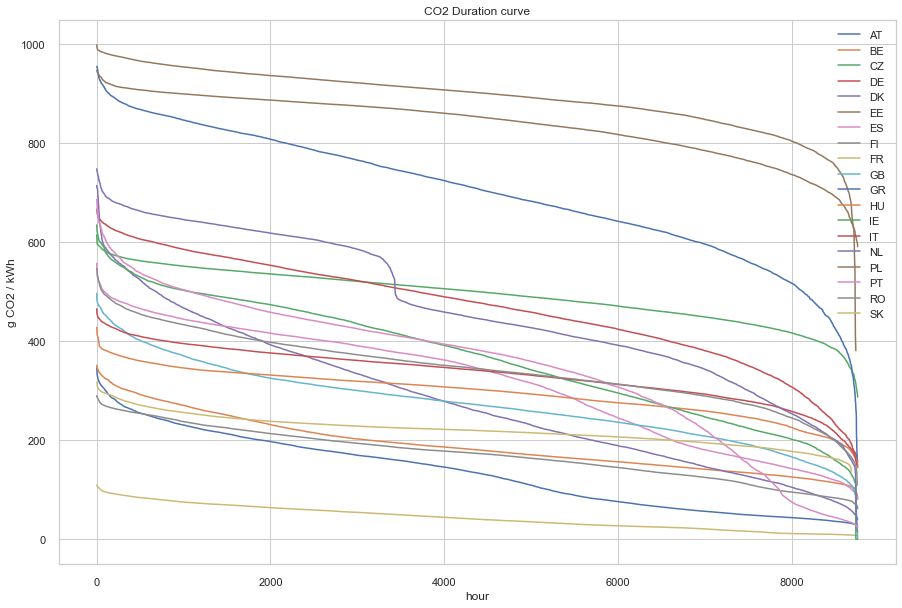

In [59]:
fig, ax = plt.subplots()

for i in countries:    
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[i].sort_values(ascending=False), label = 'CO2 Duration curve')


    
ax.legend(countries ,loc='upper right')
ax.set_xlabel('hour')
ax.set_ylabel('g CO2 / kWh')
plt.title('CO2 Duration curve')
plt.show()

#### Multi sub Figures

In [60]:
c = ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB',
       'GR', 'HU', 'IE', 'IT', 'LT', 'LV', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE',
       'SI', 'SK']

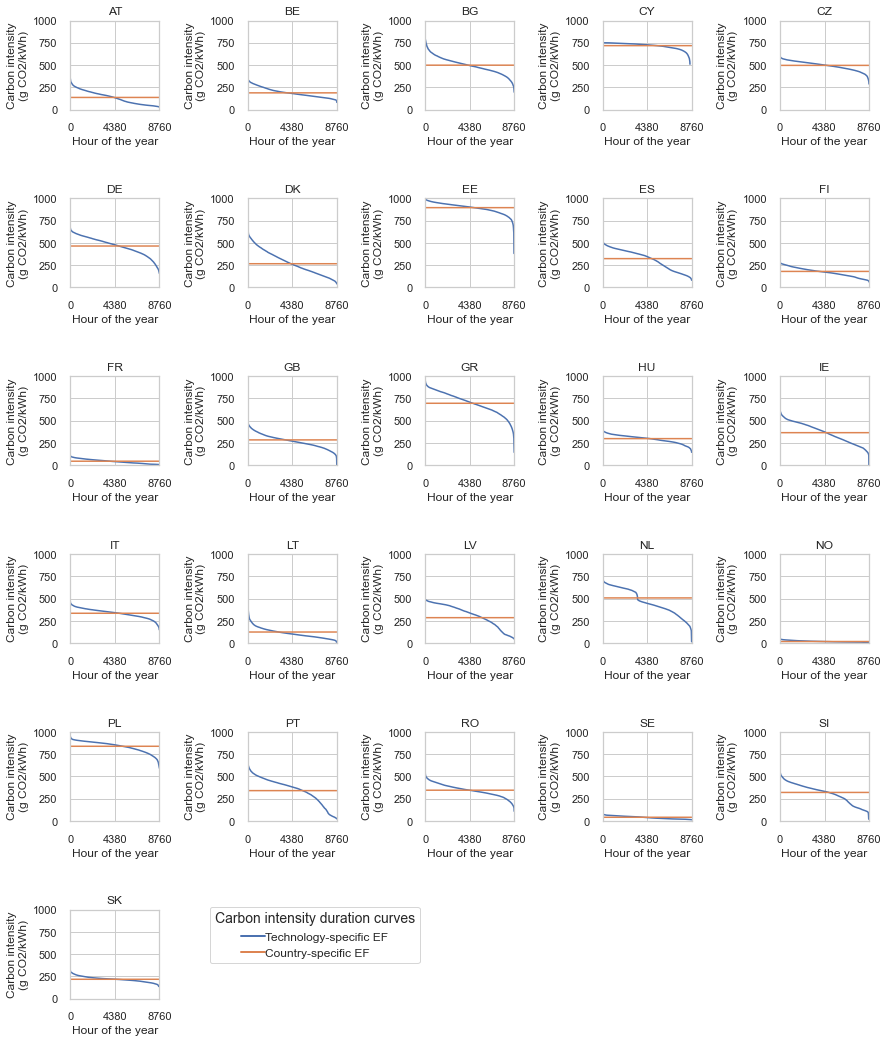

In [61]:
countries = c # Carbon_intensitiy_entsoe_gen_type.columns
n_graphs = len(c) #Carbon_intensitiy_entsoe_gen_type.columns)
#n_graphs = len(Carbon_intensitiy_entsoe_gen_type[EF.index.levels[0]].columns)

n_cols = 5
    
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1
    
    
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

fig.delaxes(axes[5][1])
fig.delaxes(axes[5][2])
fig.delaxes(axes[5][3])
fig.delaxes(axes[5][4])


size = 2.5

fig.set_size_inches(size*n_cols,size*n_rows)
    
    
for i, country in enumerate(c):
    i_row = i // n_cols
    i_col = i % n_cols
        
    ax = axes[i_row,i_col]
        
    ax.plot(range(0,8760), Carbon_intensitiy_entsoe_gen_type[country].sort_values(ascending=False))
    ax.plot(range(0,8760), ([mean_Carbon_intensitiy_entsoe_gen_type[country]]*8760))
    
    ax.set_title(country, fontsize=12)
    ax.set_xlim(0,8760)
    ax.set_ylim(0,1000)
    
    ax.set_xticks([0,4380,8760])
        
    ax.set_xlabel("Hour of the year", fontsize=12)
    ax.set_ylabel("Carbon intensity\n(g CO2/kWh)", fontsize=12)
    ax.set_aspect(8.760)
    fig.tight_layout()

handles = [Line2D([0], [0], color='C0', lw=2),
           Line2D([0], [0], color='C1', lw=2)
           ]
    
labels = ['Technology-specific EF','Country-specific EF']
    
l2 = ax.legend(handles, labels,  loc='upper left', bbox_to_anchor=(1.50, 1.10),
                   handletextpad=0., columnspacing=0.5, ncol=1,
                   title='Carbon intensity duration curves', fontsize=12, title_fontsize= 14, frameon=True)



In [62]:
Carbon_intensitiy_entsoe_gen_type.isnull().sum()

region
AT      0
BE      0
BG      0
CH      0
CY    162
CZ      0
DE      0
DK      0
EE     21
ES      0
FI      0
FR      0
GB      0
GR      0
HU      0
IE      0
IT      9
LT     22
LV      3
ME    420
NL      0
NO      0
PL      0
PT      0
RO      5
RS      0
SE      0
SI      0
SK     69
dtype: int64

In [63]:
fig.savefig(os.path.join(output_directory_path + '/CO2_duration_curve.png'),bbox_extra_artists=(l2,), bbox_inches='tight')

### Carbon Intensity Heat Map 

<AxesSubplot:xlabel='utc_timestamp', ylabel='region'>

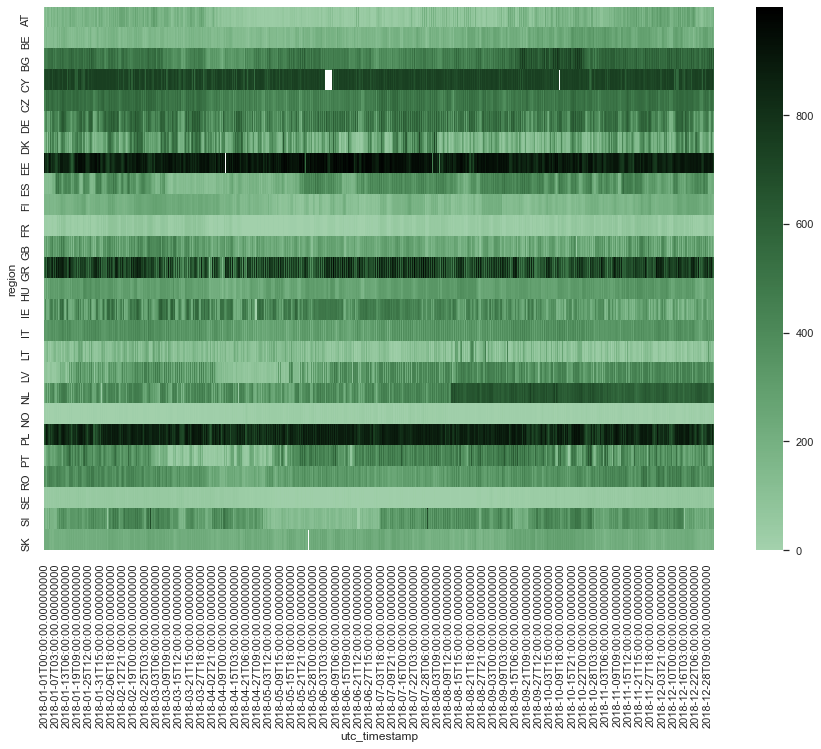

In [64]:
# all countries
sns.heatmap(Carbon_intensitiy_entsoe_gen_type[countries].transpose(), cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.75, reverse=False, as_cmap=True))

In [65]:
# use Germany as an single country example
df = Carbon_intensitiy_entsoe_gen_type['DE'].to_frame().copy()

In [66]:
df.head()

,DE
utc_timestamp,
2018-01-01 00:00:00+00:00,217.827607
2018-01-01 01:00:00+00:00,216.761245
2018-01-01 02:00:00+00:00,213.630754
2018-01-01 03:00:00+00:00,214.078055
2018-01-01 04:00:00+00:00,211.626428


In [67]:
# def names for the heat map
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df['hour']=df.index.hour
df['date']=df.index.date
df.head()

,DE,month,day,hour,date
utc_timestamp,,,,,
2018-01-01 00:00:00+00:00,217.827607,January,Monday,0,2018-01-01
2018-01-01 01:00:00+00:00,216.761245,January,Monday,1,2018-01-01
2018-01-01 02:00:00+00:00,213.630754,January,Monday,2,2018-01-01
2018-01-01 03:00:00+00:00,214.078055,January,Monday,3,2018-01-01
2018-01-01 04:00:00+00:00,211.626428,January,Monday,4,2018-01-01


In [68]:
# group the values
df1 = df.groupby(['month', 'hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
df1.head()

,month,hour,mean
0,January,0,404.708498
1,January,1,401.966532
2,January,2,400.499236
3,January,3,403.795015
4,January,4,415.552688


In [69]:
# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df1, values='mean', index=['month'], columns='hour')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])

hour               0           1           2
month                                       
April     454.758936  451.422453  454.231714
August    519.489656  520.095180  524.055801
December  388.076791  387.016181  386.981258


In [70]:
months=df1.month.unique().tolist()
print(months)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [71]:
heatmap_data=heatmap_data.loc[months]

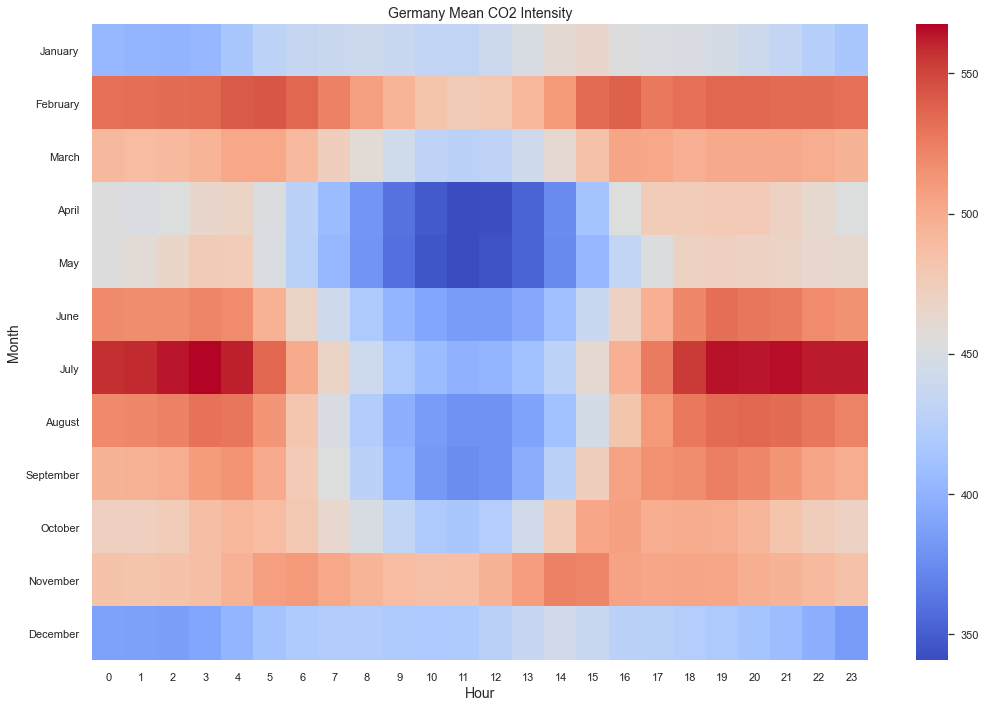

In [72]:
sns.heatmap(heatmap_data,cmap="coolwarm")
plt.xlabel("Hour", size=14)
plt.ylabel("Month", size=14)
plt.title("Germany Mean CO2 Intensity", size=14)
plt.tight_layout()

# Export final CO2 signals

In [73]:
Carbon_intensitiy_entsoe_gen_type.to_csv(processed_directory_path + '/CI_bottom_up_method.csv')
Carbon_intensitiy_entsoe_gen_type.to_csv(output_directory_path + '/CI_bottom_up_method.csv')